In [1]:
import os
import pandas as pd
from tqdm import tqdm

directory = 'output/embeddings/'

dfs = []
for f in tqdm(os.listdir(directory)):
    if f.endswith('.csv'):
        df = pd.read_csv(os.path.join(directory, f), header=None, index_col=0)
        dfs.append(df)

df = pd.concat(dfs)

# remove duplicates by index
df = df[~df.index.duplicated(keep='first')]

df

100%|██████████| 48/48 [00:53<00:00,  1.11s/it]


,1,2,3,4,5,6,7,8,9,10,...,8183,8184,8185,8186,8187,8188,8189,8190,8191,8192
0,,,,,,,,,,,,,,,,,,,,,
Relaxing and enjoyable gameplay,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
City-building and management,-0.095075,0.179425,0.036325,0.178381,-0.082033,-0.007066,0.010588,0.101490,0.077568,0.211285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Game development and early access,-0.012613,0.166634,-0.212939,0.131715,0.016330,-0.610178,-0.155136,0.267427,0.297746,0.322508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Game mechanics and features,0.001684,0.012889,0.009714,-0.005078,0.055888,-0.150594,0.024912,0.039891,0.019975,0.064069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Technical issues and bugs,0.006113,0.000061,-0.035529,0.049653,0.017259,-0.083497,0.057375,-0.021356,0.029658,0.032074,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Skill System Criticisms,0.000571,-0.014498,0.008912,-0.010655,0.011330,-0.019287,0.006828,0.002707,0.005751,-0.003328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Game Progression and Grinding,-0.006917,-0.011359,0.029852,0.005355,0.000815,-0.024215,-0.016890,0.009701,-0.016783,0.016996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Server Population and Cooperation,-0.010285,-0.005895,0.008225,-0.010913,0.011706,-0.017227,-0.004585,0.001738,0.012515,0.023032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


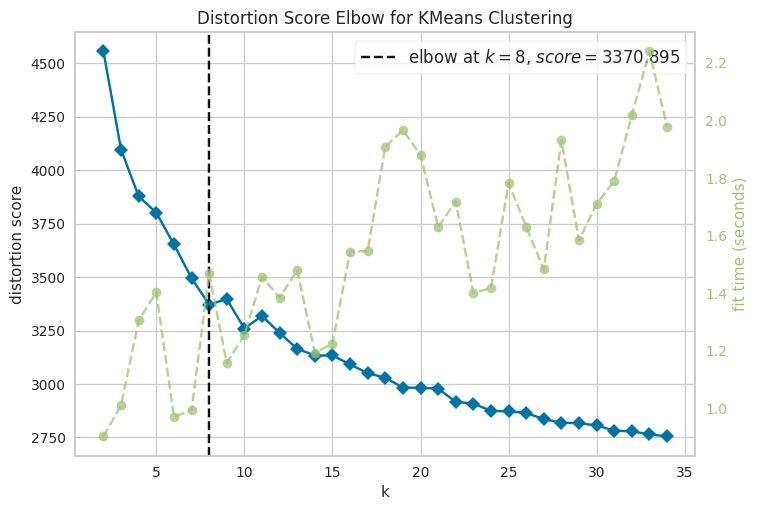

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

plt.set_loglevel('error')

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 35))
visualizer.fit(df.values)

visualizer.show()

In [3]:
clusters = KMeans(n_clusters=visualizer.elbow_value_, init='k-means++', random_state=42).fit(df.values)

df['cluster'] = clusters.labels_
df['cluster'].value_counts()

cluster
6    1316
7    1245
5    1078
3    1018
1     960
2     869
0     679
4     503
Name: count, dtype: int64